# House Price Prediction using Linear, Ridge and Lasso Regression

### Data Understanding and Exploration


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
houses = pd.read_csv("train.csv")

In [3]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(houses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data Exploration

In [14]:
houses_numeric = houses.select_dtypes(include=['float64', 'int64'])
houses_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [17]:
# dropping the ID
houses_numeric = houses_numeric.drop(['Id'], axis=1)
houses_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [26]:
# Removing few more fields that might not provide much useful info in this analysis
houses_numeric = houses_numeric.drop(['YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'PoolArea', 'MiscVal', 'YrSold'], axis=1)
houses_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,SalePrice
0,60,65.0,8450,7,5,196.0,706,856,856,854,1710,8,548,0,61,0,0,0,2,208500
1,20,80.0,9600,6,8,0.0,978,1262,1262,0,1262,6,460,298,0,0,0,0,5,181500
2,60,68.0,11250,7,5,162.0,486,920,920,866,1786,6,608,0,42,0,0,0,9,223500
3,70,60.0,9550,7,5,0.0,216,756,961,756,1717,7,642,0,35,272,0,0,2,140000
4,60,84.0,14260,8,5,350.0,655,1145,1145,1053,2198,9,836,192,84,0,0,0,12,250000


In [27]:
# correlation matrix
cor = houses_numeric.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.022936,-0.069836,-0.238518,-0.251758,0.307886,0.074853,0.040380,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,-0.013585,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.193458,0.233633,0.392075,0.457181,0.080177,0.402797,0.352096,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.011200,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.104160,0.214103,0.260833,0.299475,0.050986,0.263116,0.190015,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.001205,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.411876,0.239666,0.537808,0.476224,0.295493,0.593007,0.427452,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.070815,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.128101,-0.046231,-0.171098,-0.144203,0.028942,-0.079686,-0.057583,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.003511,-0.077856
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,1.000000,0.264736,0.363936,0.344501,0.174561,0.390857,0.280682,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,-0.005965,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.264736,1.000000,0.522396,0.445863,-0.137079,0.208171,0.044316,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,-0.015727,0.386420
TotalBsmtSF,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.363936,0.522396,1.000000,0.819530,-0.174512,0.454868,0.285573,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.013196,0.613581
1stFlrSF,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.344501,0.445863,0.819530,1.000000,-0.202646,0.566024,0.409516,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.031372,0.605852
2ndFlrSF,0.307886,0.080177,0.050986,0.295493,0.028942,0.174561,-0.137079,-0.174512,-0.202646,1.000000,0.687501,0.616423,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.035164,0.319334


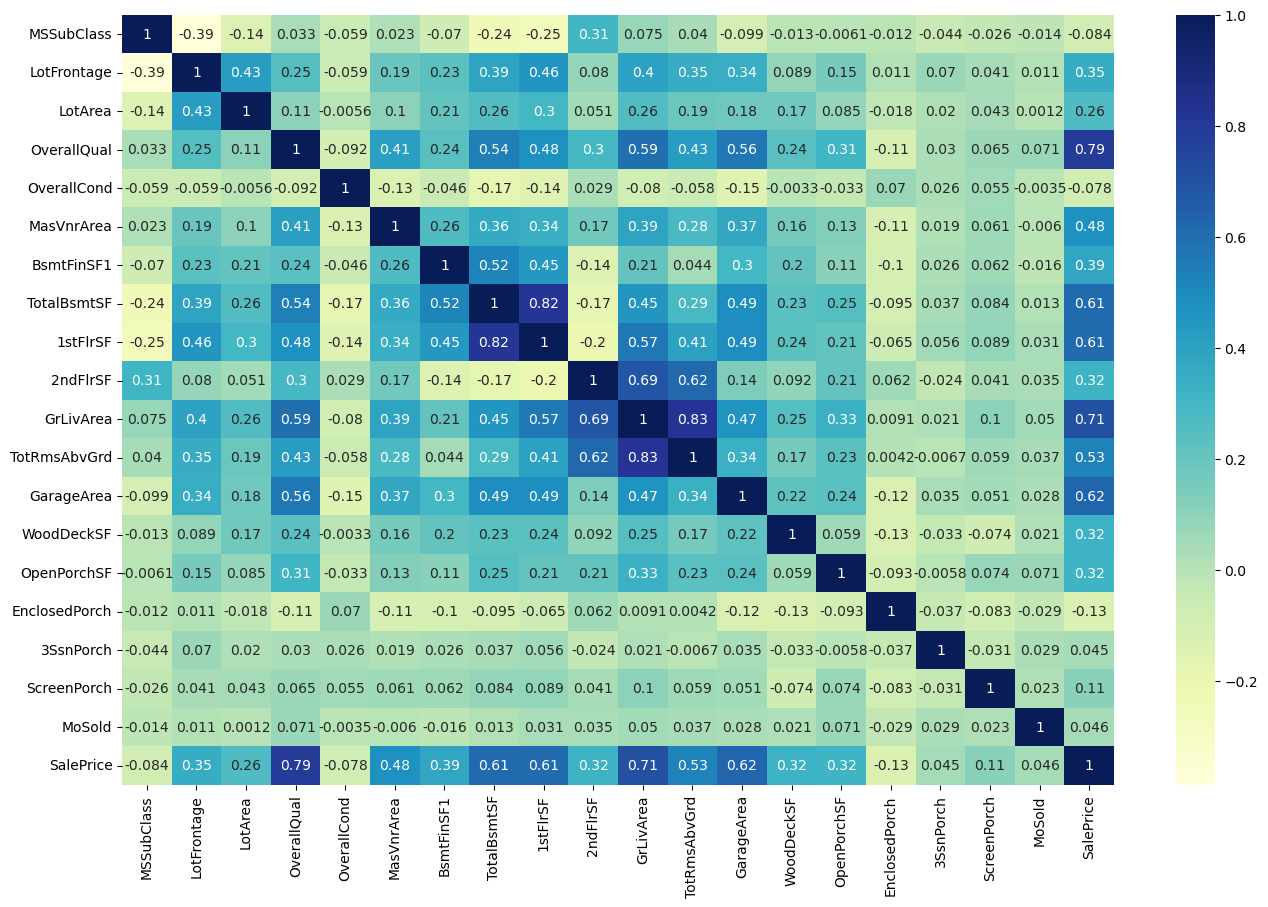

In [28]:
# plotting correlations on a heatmap

plt.figure(figsize=(16,10))

sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

The heatmap shows some useful insights:

Correlation of price w.r.t independent variables:
- Price is highly (positively) correlated to Overall Qual, TotalBsmtSF, FirstFlrSF, GrLivArea, TotRmsAbvGrd, GarageArea

- Price is negatively correlated to MSSubClass, OverallCond, EnclosedPorch but in a very less value


In [38]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [39]:
houses.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data Preparation 


In [41]:
# split into X and y
X = houses.drop(columns=['SalePrice', 'Id'])

y = houses['SalePrice']

In [44]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [45]:
# creating dummy variables for categorical variables

houses_categorical = X.select_dtypes(include=['object'])
houses_categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [47]:
# convert into dummies
houses_dummies = pd.get_dummies(houses_categorical, drop_first=True)
houses_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [48]:
# drop categorical variables 
X = X.drop(list(houses_categorical.columns), axis=1)

In [49]:
# concat dummy variables with X
X = pd.concat([X, houses_dummies], axis=1)

In [50]:
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=245)

In [51]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [53]:
houses.fillna(0, inplace=True)

In [55]:
# Changing all NA values to 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)

## Model Building and Evaluation

## Linear Regression


In [56]:
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [57]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-33082700501184.742
[-1.79206790e+03  1.83821665e+03  6.84691288e+03  8.85346066e+03
  6.47857294e+03  1.30634455e+04  2.35985045e+03  4.02586810e+03
  1.44640690e+15  5.11585806e+14  1.40127623e+15 -1.39124987e+15
 -1.20342130e+15 -1.35888329e+15 -1.51360341e+14  1.63578465e+15
  1.04180469e+03 -4.67250000e+02  1.32765625e+02 -1.64146875e+03
 -2.80734375e+03 -3.35187500e+03 -7.94093750e+02  1.05587500e+03
  1.27150000e+03  3.82502734e+03  1.37688281e+03  1.16666504e+03
  1.35706250e+03 -4.62175781e+02  5.92140625e+02  6.97275391e+02
  6.75946875e+03  1.00429688e+02 -5.98860840e+02 -9.49187500e+02
  5.65533594e+03  2.68292188e+03  1.06759688e+04  7.32076562e+03
  2.11728125e+03 -5.54468750e+02 -1.04601562e+02  8.88867188e+01
  8.26718750e+02  4.12812500e+02 -1.31316406e+03  1.18668750e+03
 -1.59156250e+02  2.46504297e+03 -1.16677148e+03  1.69850159e+02
  6.43437500e+01  8.34378906e+02 -2.59207031e+03  6.59656250e+02
  6.82125000e+02  1.80810156e+03 -4.43640625e+02 -5.77531250e+02
  5.0

In [58]:
from sklearn.metrics import r2_score, mean_squared_error

In [59]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9498053633505678
-1.288664375151206e+21
320276857809.2202
3.63237442165477e+33
313689380.8121648
8.293092286883037e+30


## Ridge and Lasso Regression


### Ridge Regression

In [61]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [62]:
print(model_cv.best_params_)

{'alpha': 100}


In [75]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-3.15253712e+03  1.58977833e+03  4.41882012e+03  1.04174371e+04
  4.64542710e+03  4.54400141e+03  3.22649144e+03  4.45738729e+03
  5.40196383e+03  1.35831234e+03  9.26041835e+02  7.04831800e+03
  7.57006396e+03  9.46641440e+03 -1.63046898e+03  1.32822742e+04
  2.24431255e+03 -7.00557378e+01  3.20901378e+03  1.02833181e+03
 -1.72315845e+03 -2.83891754e+03  2.86923729e+03  3.21658982e+03
  1.18221084e+03  4.05884052e+03  2.44646145e+03  1.42875353e+03
  1.41789890e+03 -3.95046910e+02  7.90524219e+02  9.36942771e+02
  3.85510093e+03  1.29070950e+01 -4.88697287e+02 -6.53292365e+02
  9.76688134e+02  3.36759371e+02  1.83916584e+03  3.41217019e+02
  1.41856125e+03 -1.03112365e+02  8.67942873e+01 -7.63224682e+02
  3.12527350e+02  1.41554187e+03 -3.14360005e+02  1.74326505e+03
 -5.90240304e+02  2.53899272e+03 -1.39285806e+03 -3.60277656e+02
 -2.78687584e+02  6.96072709e+02 -9.53115813e+02  1.28034202e+02
 -1.48475950e+02  2.66329730e+02 -2.30536497e+02 -7.83057677e+02
  3.80530338e+03 -2.85673

In [76]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9382248863431729
0.7143703767962215
394168393547.6757
805107797963.7308
386061110.2327872
1838145657.4514403


### Lasso Regression

In [77]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [78]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [79]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha = 500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500)

In [80]:
lasso.coef_

array([-4.17001208e+03,  1.69463167e+03,  3.66745309e+03,  1.18273659e+04,
        5.53652059e+03,  8.45396988e+03,  3.08678186e+03,  3.66337648e+03,
        6.37820148e+03,  0.00000000e+00, -0.00000000e+00,  9.82748077e+03,
        0.00000000e+00,  1.84479082e+03, -2.40650972e+03,  3.15064398e+04,
        1.60396903e+03, -0.00000000e+00,  6.21523451e+02,  0.00000000e+00,
       -2.37013539e+03, -3.41465120e+03,  0.00000000e+00,  1.12823797e+03,
        1.65141212e+03,  2.10064734e+03,  1.86956283e+03,  6.50931539e+02,
        7.70410262e+02, -1.19185262e+02,  1.76355097e+02,  0.00000000e+00,
        3.31528835e+03, -0.00000000e+00, -1.28214945e+02, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  9.77531060e+02, -2.88693789e+02,
        9.31939190e+02, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  1.32277298e+02,
       -1.61369665e+02,  1.77799821e+03, -4.56341393e+02, -0.00000000e+00,
        0.00000000e+00,  

In [81]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9386504839486323
0.5394319802478871
391452783417.4612
1298208848353.9143
383401354.9632333
2963947142.360535


In [82]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.498054e-01,9.382249e-01,9.386505e-01
1,R2 Score (Test),-1.288664e+21,7.143704e-01,5.394320e-01
2,RSS (Train),3.202769e+11,3.941684e+11,3.914528e+11
3,RSS (Test),3.632374e+33,8.051078e+11,1.298209e+12
4,MSE (Train),1.771128e+04,1.964844e+04,1.958064e+04
5,MSE (Test),2.879773e+15,4.287360e+04,5.444214e+04


### Changes in the coefficients after regularization

In [83]:
betas = pd.DataFrame(index=X.columns)

In [84]:
betas.rows = X.columns

In [85]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [86]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
MSSubClass,-1.792068e+03,-3152.537125,-4170.012080
LotFrontage,1.838217e+03,1589.778334,1694.631668
LotArea,6.846913e+03,4418.820122,3667.453093
OverallQual,8.853461e+03,10417.437096,11827.365914
OverallCond,6.478573e+03,4645.427102,5536.520585
YearBuilt,1.306345e+04,4544.001413,8453.969885
YearRemodAdd,2.359850e+03,3226.491436,3086.781858
MasVnrArea,4.025868e+03,4457.387290,3663.376484
BsmtFinSF1,1.446407e+15,5401.963829,6378.201479
BsmtFinSF2,5.115858e+14,1358.312336,0.000000


The Linear, Ridge and Lasso regressions show the relationship between the response variable and the predictor variable.

Based on the above data, we can see that the highest positive relationship is for the variables 'OverallQual', 'TotalBsmtSF', '2ndFlrSF' and 'GrLivArea'.

Similarly, the highest negative relationship is for the variables 'MSSubClass', 'LowQualFinSF', 'BedroomAbvGr' and 'KitchenAbvGr'

### Doubling the alpha values

In [87]:
# Doubling alpha for Ridge regression

alpha = 200
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-3.00362994e+03  1.47296634e+03  3.72299384e+03  1.00060417e+04
  3.92267406e+03  3.08806526e+03  3.30647609e+03  4.37954028e+03
  4.49446599e+03  1.08025488e+03  9.73403316e+02  6.05029823e+03
  6.96617056e+03  7.33304266e+03 -1.17172249e+03  1.11082073e+04
  2.43116442e+03  3.61850620e+01  3.67318667e+03  1.63505710e+03
 -9.91786769e+02 -2.56546721e+03  3.72702431e+03  3.49302825e+03
  1.17674870e+03  4.10470536e+03  2.95312927e+03  1.63861547e+03
  1.39572173e+03 -2.67910298e+02  8.40127149e+02  1.03071600e+03
  2.62025172e+03  1.45506437e+01 -4.28382677e+02 -5.55507211e+02
  8.37073420e+02  2.14433924e+02  1.38455338e+03 -2.86087356e+02
  1.17338444e+03 -3.14062974e+01  1.96997686e+02 -1.10375736e+03
  5.60752090e+01  1.48932351e+03 -3.65159262e+01  1.67096186e+03
 -7.05398230e+02  2.45152706e+03 -1.34987787e+03 -4.43666695e+02
 -3.53189222e+02  6.78881984e+02 -4.99285225e+02  3.16493934e+01
 -2.22999862e+02  2.25081515e+02 -8.18657780e+01 -9.25419463e+02
  3.46817891e+03 -2.88149

In [88]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9268385237950068
0.771367044047861
466821343389.17017
644450577793.3269
457219729.0785212
1471348351.126317


In [89]:
# Doubling alpha for Lasso regression

alpha = 1000

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=1000)

In [90]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9267076561837785
0.5786930078575447
467656370199.0253
1187543297876.1423
458037580.99806595
2711286068.2103705


In [91]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.498054e-01,9.268385e-01,9.267077e-01
1,R2 Score (Test),-1.288664e+21,7.713670e-01,5.786930e-01
2,RSS (Train),3.202769e+11,4.668213e+11,4.676564e+11
3,RSS (Test),3.632374e+33,6.444506e+11,1.187543e+12
4,MSE (Train),1.771128e+04,2.138270e+04,2.140181e+04
5,MSE (Test),2.879773e+15,3.835816e+04,5.207001e+04


In [92]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns

betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
MSSubClass,-1.792068e+03,-3003.629944,-3865.730523
LotFrontage,1.838217e+03,1472.966342,1243.371140
LotArea,6.846913e+03,3722.993844,3211.958226
OverallQual,8.853461e+03,10006.041684,14453.632957
OverallCond,6.478573e+03,3922.674061,4523.917531
YearBuilt,1.306345e+04,3088.065256,8177.778213
YearRemodAdd,2.359850e+03,3306.476091,3541.758175
MasVnrArea,4.025868e+03,4379.540277,2992.428732
BsmtFinSF1,1.446407e+15,4494.465987,6573.478835
BsmtFinSF2,5.115858e+14,1080.254884,0.000000


Variables 'OverallQual' and 'GrLivArea' seems to be the most correlated among all variables to the price now